## Decision Tree Learning
- Decision 1: How to choose what feature to split on at each node to maximize purity (minimize impurity)
- Decision 2: When do you stop splitting?
    - When a node is 100% one class
    - WHen splitting a node will result in exceeding a maximum depth
    - When improvements in purity score are below a threshold
    - When the number of examples in a node is below a threshold

## Entropy
- measure of impirity of data
- Entropy function: H(p1 )
- closer to 50/50 mix, closer to maximum entropy (1.0)

**H(p1) = -p1*log2(p1) - p0*log2(p0)** = -p1*log2(p1) - (1-p1)*log2(-p1)

## Choosing a Split: Information Gain
- node with lots of examples and high entropy is worse than node with few examples and high entropy
- **Information Gain:** the reduction in entropy that you get from your tree resulting from making a split
    - p1_left = fraction in left split with a positive label
    - w_left = fraction of examples out of all root examples that went to left node

    - p1_right = fraction in right split with a positive label
    - w_right = fraction of examples out of all root examples that went to right node

    - p1_root = fraction of positive labels in root node

***Information Gain = H(p1_root) - [w_left * H(p1_left) + w_right * H(p1_right)]***

- for regression trees, p1_root, p1_left and p1_right are **varainces** -> split on biggest variance reduction

## Decision Tree Code

In [1]:
import numpy as np

# load some examples. X_train contains 3 features: ear shape (1 = points), face shape (1 = round), and whiskers (1 = present)
# y_train contains labels, 1 = cat, 0 = otherwise
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [2]:
# entropy function
def entropy(p):
    # handels boundary conditions where function would be mathematically undefined
    if p == 1 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1-p) * np.log2(1-p)
    

In [3]:
def split_indices(X, index_feature):
    left_indicies = []
    right_indicies = []

    for i, x in enumerate(X):
        if x[index_feature] == 1:
            left_indicies.append(i)
        else:
            right_indicies.append(i)
    
    return left_indicies, right_indicies

In [4]:
def weighted_entropy(X, y, left_indicies, right_indicies):
    
    # proportion of examples at node
    w_left = len(left_indicies) / len(X)
    w_right = len(right_indicies) / len(X)

    # proportion of labels in node
    p_left = sum(y[left_indicies]) / len(left_indicies)
    p_right = sum(y[right_indicies]) / len(right_indicies)

    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)

    return weighted_entropy

In [5]:
def information_gain(X, y, left_indicies, right_indicies):
    p_node = sum(y) / len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X, y, left_indicies, right_indicies)

    info_gain = h_node - w_entropy
    
    return info_gain

In [6]:
# information gain for splitting root for each feature

for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


## Tree Ensembles ##

- majority vote amonst the trees gives overall result
- create new random training set using sampling with replacement (can include repeats)

Procedure - Bagged Trees
given training set of size m
for b = 1 to B:
    use sampling with replacement to create a new training set of size m
    train a decision tree on the new data set

- **Reccommended 64-128 trees**. Larger B never hurts performance but diminishing returns


Random Forest Algorithm
- At each node, when choosing a feature to use to split, if n features are available, pick a random subset of k < features and allow the algorithm to only choose from that subset of features
    - typically k = √n

##  (eXtreme Gradient) Boost
- modification to bagged decision tree algorithm

given training set of size m
for b = 1 to B:
    use sampling with replacement to create a new training set of size m, **but instead of picking from all examples with equal (1/m) probability, make it more likely to pick misclassified examples from previously trained trees
    train a decision tree on the new data set



**Benefits of XG boost:**
- open source implementation of boosted trees
- fast efficient implementation
- good choice of default splitting criteria and criteria for when to stop splitting
- built in regularization to prevent overfitting
- highly competitive algorithm for machine learning competitions (i.e Kaggle competitions)


## Decision Trees vs Neural Networks
**Decision Trees and Tree Ensembles**
- works well on tabular (structured) data
- not recommended for unstructured data (images, audio, text, overall things not stored as tables)
- fast!
- small decision trees may be interpreted by humans 

**Neural Netwrorks**
- works well on all types of data, including tabular (structured) and unstructured data
- may be slower than a decision tree
- works with transfer learning
- when building a system of multiple models working together, it might be easier to string together multiple neural networks

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55

# kaggle dataset
df = pd.read_csv("heart.csv")

cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# use get_dummies to one-hot encode the variables with three or more values
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [8]:
# target is HeartDisease, all other features are potential predictors
features = [x for x in df.columns if x not in 'HeartDisease']

# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


## Decision Tree


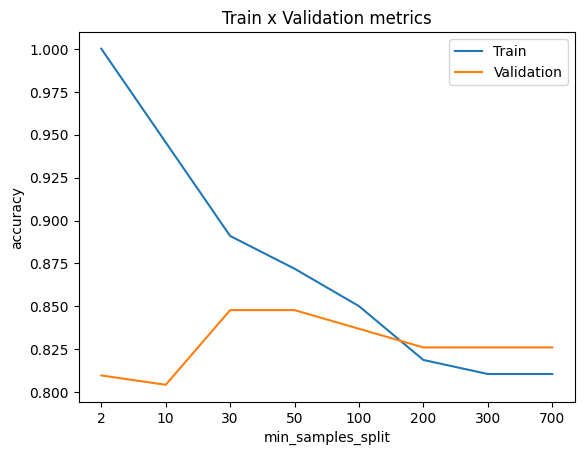

In [ ]:
# Decision Tree
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

# Experimenting with minimum samples in each split
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE)
    model.fit(X_train, y_train) 

    predictions_train = model.predict(X_train)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_list_train.append(accuracy_train)

    predictions_val = model.predict(X_val)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_val.append(accuracy_val)


plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# best split appears to be 50

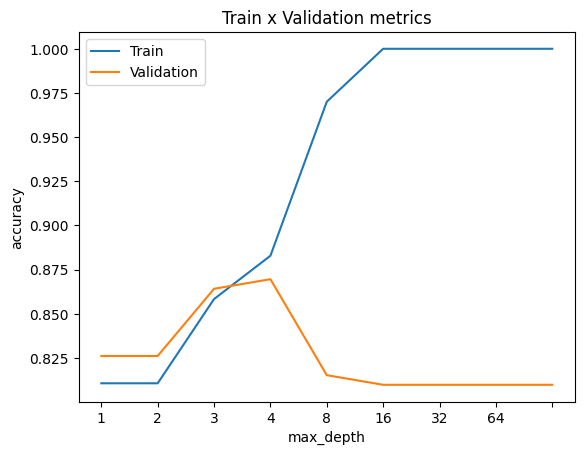

In [ ]:
# Experimenting with maximum depth
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = DecisionTreeClassifier(max_depth = max_depth, random_state = RANDOM_STATE)
    model.fit(X_train, y_train)

    predictions_train = model.predict(X_train)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_list_train.append(accuracy_train)

    predictions_val = model.predict(X_val)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_val.append(accuracy_val)


plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# best depth appears to be 4

In [11]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50, max_depth = 4, random_state = RANDOM_STATE)
decision_tree_model.fit(X_train, y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8665
Metrics validation:
	Accuracy score: 0.8696


## Random Forest

- we choose a random subset of features and a random subset of training examples to train each inidividual tree (typically sqrt(n) number of features)
- additional hyperparameter **n_estimators** - the number of decision trees that make up the random forest
- you can speed up training jobs with the **n_jobs** parameter
    - since tree fittings are independent of each other, it is possible to run this process in parallel to reduce training time
    - setting n_jobs higher will increase how many CPU cores are used, however, numbers very close to the maximum cores of your CPU may impact overall performance of the PC and even lead to freezes



In [ ]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10, 50, 100, 500]

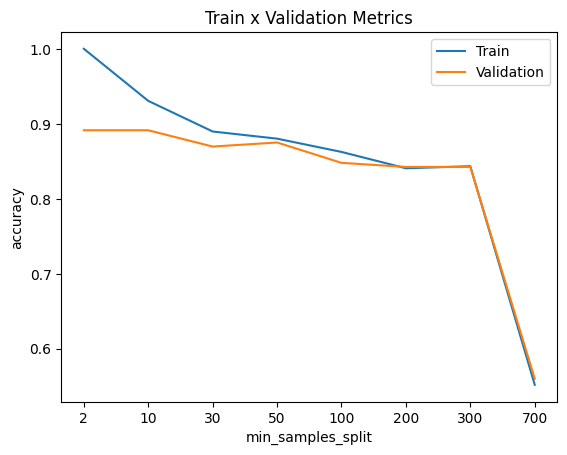

In [12]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE)
    model.fit(X_train, y_train)

    predictions_train = model.predict(X_train)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_list_train.append(accuracy_train)

    predictions_val = model.predict(X_val)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation Metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])


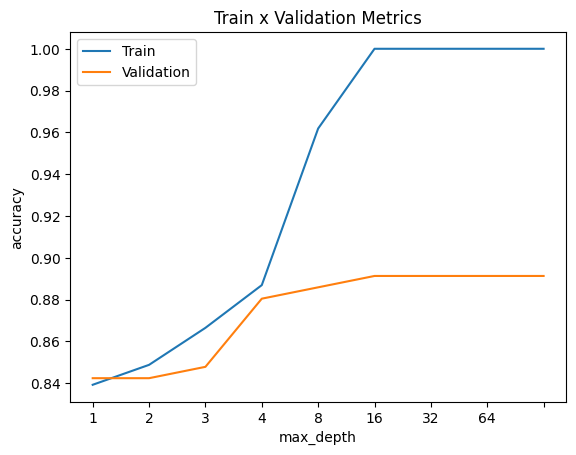

In [14]:
accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth, random_state = RANDOM_STATE)
    model.fit(X_train, y_train)

    predictions_train = model.predict(X_train)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_list_train.append(accuracy_train)

    predictions_val = model.predict(X_val)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation Metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)), labels = max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])